
# Project: Investigate a Dataset - [Missed Medical Appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This is a database of 110, 527 medical appointments in Brazil, with emphasis on whether or not patients show up for their appointment. Characteristics of patients, as exactly contained in this dataset, are explained below;

- PatientId: Patient's identification number.
- AppointmentID: Appointment identification number.
- Gender: "M" if male, and "F" if female.
- ScheduledDay: The day appointment was booked.
- AppointmentDay: Actual day of check-up.
- Age: Age of patient.
- Neighbourhood: Indicates the location of hospital.
- Scholarship: "1" if enrolled in Brasilian welfare program, and "0" if not enrolled.
- Hipertension: "1" if hypertensive, and "0" if not hypertensive.
- Diabetes: "1" if diabetic, and "0" if not diabetic.
- Alcoholism: "1" if alcoholic, and "0" if not alcoholic.
- Handcap: "1 to 4" if handicapped, and "0" if not handicapped.
- SMS_received: "1" if sent an SMS, and "0" if not sent.
- No-show: "No" if the patient showed up for the appointment, and "Yes" if they did not show up.



### Question(s) for Analysis
Although it is logical to investigate if patients with a specific medical condition generally ignore appointments, this study does not recognize medical conditions as factors affecting response. The 'patient_id' and 'appointment_id entries are also considered inconsequential here. Hence, the questions to be answered in this study are:
1. What is the general response of patients to scheduled appointments?
2. How does gender affect response to appointments?
3. Is there a preferred day of the week by patients for showing up?
4. What is the age distribution of patients?
5. Which neighbourhoods have the most and least schedules?
6. Does scholarship encourage response?
7. Will SMS facilitate response?

In [139]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
sb.set_style('dark')

<a id='wrangling'></a>
## Data Wrangling


### General Properties


In [140]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


As observed from the table above;
- All variable names are not in the recommended Python standard for improved readability, and some are misspelt.
- There are 14 variables, with no_show being the dependent variable.
- The 'AppointmentDay' and 'ScheduledDay' entries have inconsistencies in formats.

### Data Cleaning


Renaming columns by correcting misspelt variable names, replacing uppercase characters with lower ones, removing hyphens, and then introducing underscores to improve readability. 
Furthermore, entry for "No-show" is "No" if the patient showed up for the appointment, and "Yes" if they did not show up. This is somewhat confusing. For clarity, "No-show" is renamed as "absent". 

In [141]:
# rename misspelt variable names
df.rename(columns = {'PatientId': 'patient_id', 'AppointmentID': 'appointment_id', 'Gender': 'gender', 'ScheduledDay': 'scheduled_day', 'AppointmentDay': 'appointment_day', 'Age': 'age', 'Neighbourhood': 'neighbourhood', 'Scholarship': 'scholarship', 'Hipertension': 'hypertension', 'Diabetes': 'diabetes', 'Alcoholism': 'alcoholism', 'Handcap': 'handicap', 'SMS_received': 'sms_received', 'No-show': 'absent'}, inplace = True)

#### Confirming rename action.

In [142]:
# confirm rename action success
df.head(1)

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,absent
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


#### What are the data types?

In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   patient_id       110527 non-null  float64
 1   appointment_id   110527 non-null  int64  
 2   gender           110527 non-null  object 
 3   scheduled_day    110527 non-null  object 
 4   appointment_day  110527 non-null  object 
 5   age              110527 non-null  int64  
 6   neighbourhood    110527 non-null  object 
 7   scholarship      110527 non-null  int64  
 8   hypertension     110527 non-null  int64  
 9   diabetes         110527 non-null  int64  
 10  alcoholism       110527 non-null  int64  
 11  handicap         110527 non-null  int64  
 12  sms_received     110527 non-null  int64  
 13  absent           110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


Each column having 110,527 entries¸ implies the absence of missing values.
"AppointmentDay" and "ScheduledDay" entries ought to be datetime datatypes. 
"PatientId" entries ought to be integer datatypes.

#### Are there duplicated rows?

In [144]:
sum(df.duplicated())

0

#### Are there null values?

In [145]:
df.isna().sum()

patient_id         0
appointment_id     0
gender             0
scheduled_day      0
appointment_day    0
age                0
neighbourhood      0
scholarship        0
hypertension       0
diabetes           0
alcoholism         0
handicap           0
sms_received       0
absent             0
dtype: int64

#### How many unique entries are present?

In [146]:
df.nunique()

patient_id          62299
appointment_id     110527
gender                  2
scheduled_day      103549
appointment_day        27
age                   104
neighbourhood          81
scholarship             2
hypertension            2
diabetes                2
alcoholism              2
handicap                5
sms_received            2
absent                  2
dtype: int64

62, 299 patients with 110, 527 appointments indicates that some patients were scheduled for more than one appointment.
103, 549 schedule days with just 27 appointment days indicates that each appointment day was scheduled several times.

As earlier stated, this study considers the "patient_id", "appointment_id", "hypertension", "diabetes", "alcoholism", and "handicap" entries as inconsequential to the appointment response, and hence are to be dropped.

In [147]:
df.drop(['patient_id', 'appointment_id', 'hypertension', 'diabetes', 'alcoholism', 'handicap'], axis=1, inplace=True)

#### Confirming drop action.

In [148]:
df.head(1)

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,sms_received,absent
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,0,No


#### Converting all 'scheduled_day' and 'appointment_day' entries to datetime data types.

In [149]:
df['scheduled_day'] = pd.to_datetime(df['scheduled_day'])

In [150]:
df['appointment_day'] = pd.to_datetime(df['appointment_day'])


#### Confirming the conversions.

In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype              
---  ------           --------------   -----              
 0   gender           110527 non-null  object             
 1   scheduled_day    110527 non-null  datetime64[ns, UTC]
 2   appointment_day  110527 non-null  datetime64[ns, UTC]
 3   age              110527 non-null  int64              
 4   neighbourhood    110527 non-null  object             
 5   scholarship      110527 non-null  int64              
 6   sms_received     110527 non-null  int64              
 7   absent           110527 non-null  object             
dtypes: datetime64[ns, UTC](2), int64(3), object(3)
memory usage: 6.7+ MB


#### Checking the DataFrame description.

In [152]:
(df.describe())

,age,scholarship,sms_received
count,110527.000000,110527.000000,110527.000000
mean,37.088874,0.098266,0.321026
std,23.110205,0.297675,0.466873
min,-1.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000
75%,55.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000


The mean age of patients is 37 years, maximum age is 115 years, and minimum age is -1.

Since age cannot be a negative figure, it’s necessary to check how many entries having age as -1 are present.

In [153]:
# check number of rows having age as -1
(df['age'] == -1).value_counts()

False    110526
True          1
Name: age, dtype: int64

Just one out of a total of 110, 527 entries has age as -1. Dropping this row won't have any severe effect. Hence, this study considers dropping the row with the negative age entry as the most logical thing to do.

In [154]:
# exclude any negative age
df = df[df.age > -1]

#### What is the new minimum age?

In [155]:
df['age'].min()

0

#### How many entries have ages as zero (0)?

In [156]:
(df['age'] == 0).value_counts()

False    106987
True       3539
Name: age, dtype: int64

3,539 out of 110, 527 entries have zero (0) as age, and this is considered significant in this study. Hence, this study considers patients with zero (0) year as infants.

<a id='eda'></a>
## Exploratory Data Analysis




### Research Question 1: What is the general response of patients to scheduled appointments?

In [157]:
# general response count 
response_count = (df['absent']).value_counts()
response_count

No     88207
Yes    22319
Name: absent, dtype: int64

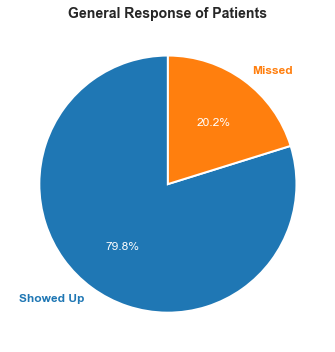

In [158]:
fig, ax = plt.subplots(figsize = (5, 5))
# Capture each of the return elements.
patches, texts, pcts = ax.pie(
    response_count, labels = ['Showed Up', 'Missed'], autopct = '%.1f%%',
    wedgeprops = {'linewidth': 2.0, 'edgecolor': 'white'},
    textprops = {'size': 'large'},
    startangle = 90)
# For each wedge, set the corresponding text label color to the wedge's
# face color.
for i, patch in enumerate(patches):
  texts[i].set_color(patch.get_facecolor())
plt.setp(pcts, color = 'white')
plt.setp(texts, fontweight = 600)
ax.set_title('General Response of Patients', fontsize = 14, weight = 'bold')
plt.tight_layout()

20% of patients do not show up for their scheduled appointments. This is a significant portion that is examined by exploring the subsequent characteristics provided in the database, and see how they affect a patient's response to schedules.

Each given characteristic will be grouped by the "absent" column and then represented pictorially. A function is relevant here to avoid repetitions. 

In [159]:
def pic_rep(plot_kind, df, title, xlabel, ylabel, x, deg, order = None):
    """
    This function plots a bar chart.
    
    Parameters:
        plot_kind (string): kind of plot
        df: The DataFrame to be plotted.
        title (string): Title of the plot.
        xlabel (string): x-axis label.
        ylabel (string): y-axis label.
        x: logarithmic scale (True or False)
        deg (int): degree of rotation
        
    """
    g = df.plot(figsize = (11, 5), kind = plot_kind, log = x)
    # ticks angle of rotation
    plt.xticks(rotation = deg)
    # add x label and format it
    plt.xlabel(xlabel, size = 12, weight = 'bold')
    # add y label and format it
    plt.ylabel(ylabel, size = 12, weight = 'bold')
    # add title and format it 
    plt.title(title, size = 14, weight = 'bold')
    # format legend
    plt.legend(["Showed Up", "Absent"]);

In [160]:
def frame(x, col_name):
    """
    This function groups other columns with respect to the 'absent' column.
    
    Parameters:
        x: The DataFrame to be grouped.
        col_name (string): column name of interest.
        
    Returns:
        group_by
    """
    group_by = (x.groupby(col_name)['absent'].value_counts()).unstack()
    return group_by
    

In [161]:
def perc(x, col_name):
    """
    This function groups other columns by percentage with respect to the 'absent' column.
    
    Parameters:
        x: The DataFrame to be grouped.
        col_name (string): column name of interest.
        
    Returns:
        percentage
    """
    percentage = (x.groupby(col_name)['absent'].value_counts(normalize=True).mul(100).round(2)).unstack()
    return percentage

### Research Question 2: Does gender affect response to scheduled appointment?

In [162]:
# group response by gender
gender_response = frame(df, 'gender')
gender_response

absent,No,Yes
gender,,
F,57245,14594
M,30962,7725


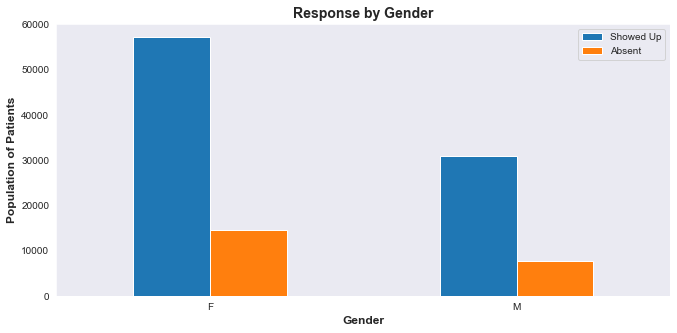

In [163]:
# make a bar plot of the gender response
pic_rep('bar', gender_response, 'Response by Gender', 'Gender', 'Population of Patients', False, 360);

At first glance, it seems more females show up for appointments than males. Actually, this isn't a fair comparison because there are generally more females than males. However, an balanced comparison would be to ask, "Out of a given number of scheduled females/males, how many show up or miss their appointments?" 
In essence, taking the percentage attendance by gender is a more balanced comparison.

In [164]:
# find the percentage response by gender
gender_response_percentage = perc(df, 'gender')
gender_response_percentage

absent,No,Yes
gender,,
F,79.69,20.31
M,80.03,19.97


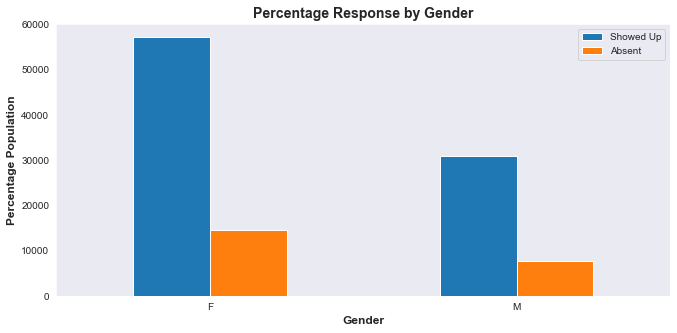

In [165]:
# make a plot of the percentage response by gender
pic_rep('bar', gender_response, 'Percentage Response by Gender', 'Gender', 'Percentage Population', False, 360);

The percentage response by gender shows that both males and females have equal likelihood of missing or showing up for appointments.

### Research Question 3: Do specific days of the week affect response to schedules?

With respect to the "appointment_day" entries, let’s create two new columns to actually view the days and months of appointments.

In [166]:
df['day_entry'] = df.appointment_day.dt.day_name()

In [167]:
df['month_entry'] = df.appointment_day.dt.month_name()

Confirming if the columns have actually been created.

In [168]:
df.head(1)

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,sms_received,absent,day_entry,month_entry
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,0,No,Friday,April


#### Which days have the highest and least number of appointments?

In [169]:
def bar_plot(df, var_count, var_name, x_label, y_label, title, log, hue, color, order = None):
    """
    This function makes a bar plot of a specified variable.
    
    Parameters:
        df: DataFrame of interest
        var_count (String): Variable count
        order (String): Variable order
        var_name (string): Variable to be plotted
        x_label (String): Horizontal axis label
        y_label (String): Vertical axis label.
        title (String): Plot title.  
        log(bool): Logarithmic scale
        hue(String): hue
        color: hue color
    """
    # order the unique values by count
    var_count = df[var_name].value_counts()

    # adjust figure size
    plt.figure(figsize = [11, 5])
    # set base color
    base_color = sb.color_palette()[0]
    # make a bar plot of the variable
    sb.countplot(data = df, x = var_name, color = color, log = log, hue = hue, order = order)
    # add x label and format it
    plt.xlabel(x_label, size = 12, weight = 'bold')
    # add y label and format it
    plt.ylabel(y_label, size = 12, weight = 'bold')
    # add title and format it 
    plt.title(title, size = 14, weight = 'bold')
    # format legend
    plt.legend(["Showed Up", "Absent"], loc = 'upper right');

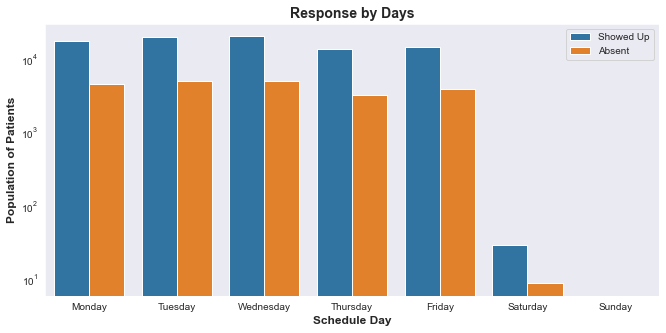

In [170]:
# set horiontal axis label order
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
# make a bar plot of the start day variable
bar_plot(df, 'day_count', 'day_entry', 'Schedule Day', 'Population of Patients', 'Response by Days', 
         True, 'absent', None, order = day_order);

The daily response chart shows that only six distinct days have schedules. Most patients show up on Wednesdays, Tuesdays and Mondays, in order of decreasing magnitude, while Saturdays have the least number of schedules.
Although the days with most and least schedules have been identified, this still isn't enough to determine response. It could be that only one person gets scheduled on Saturdays and always shows up.
Hence, the need to check the daily percentage response. 


In [171]:
# find the percentage response by days
daily_response_percentage = perc(df, 'day_entry')
daily_response_percentage

absent,No,Yes
day_entry,,
Friday,78.77,21.23
Monday,79.35,20.65
Saturday,76.92,23.08
Thursday,80.65,19.35
Tuesday,79.91,20.09
Wednesday,80.31,19.69


In [172]:
# reorder the index by days of the week
daily_percentage = daily_response_percentage.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

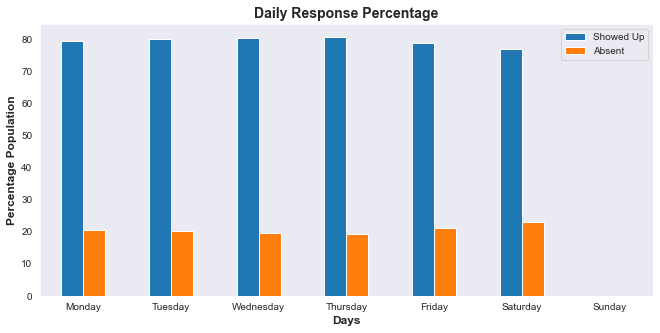

In [173]:
# make a plot of the percentage response by days
pic_rep('bar', daily_percentage, 'Daily Response Percentage', 'Days', 'Percentage Population', False, None);

The daily response percentage shows that while other days have roughly equal chances of patients showing up, Saturdays have the least chances. 

### Research Question 4: What is the age distribution of patients?

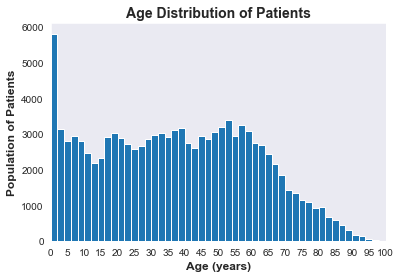

In [174]:
# set the bin edges
bin_edges = np.arange(0, df['age'].max() +2, 2)
# set the horizontal axis marks
ticks = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 
         65, 70, 75, 80, 85, 90, 95, 100]
# make a histogram plot of the age variable
plt.hist(data = df, x = 'age', bins = bin_edges)
# format the horizontal axis label to override the default standard forms for log scales
labels = ['{}'.format(v) for v in ticks]
plt.xticks(ticks, labels)
# add x label and format it
plt.xlabel('Age (years)', size = 12, weight = 'bold')
# add y label and format it
plt.ylabel('Population of Patients', size = 12, weight = 'bold')
# add title and format it.
plt.title('Age Distribution of Patients', size = 14, weight = 'bold')
# set horizontal axis limit
plt.xlim([0, 100]);

The response by age chart shows that most appointments are scheduled by people aged 65 years and below, with 0 year being the most scheduled.
It is quite logical for infants to have the highest number of schedules.

### Research Question 5: Which neighbourhoods have the most and least schedules?

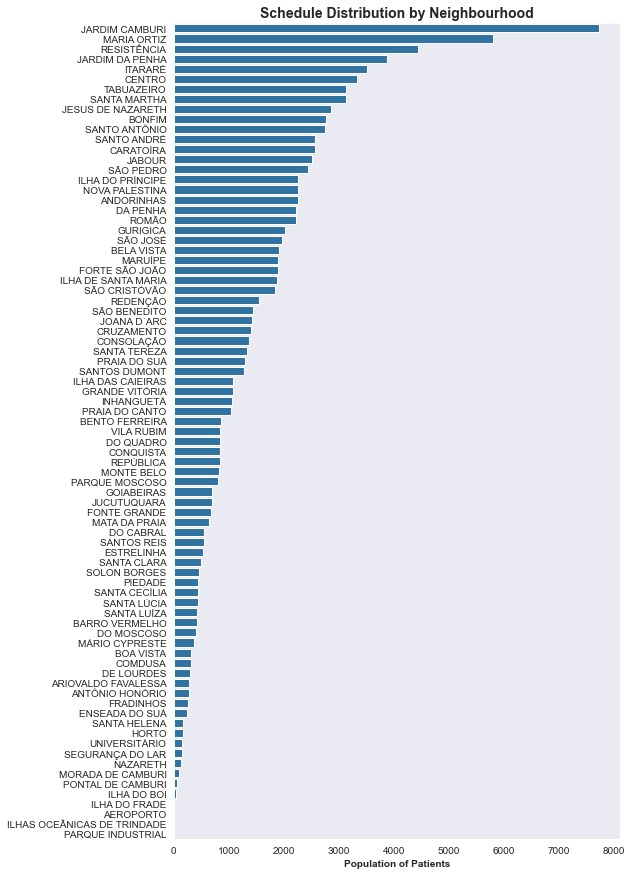

In [175]:
# order the unique values by count
var_count = df['neighbourhood'].value_counts()
    
plt.figure(figsize = [8, 15])
# make a bar plot of the variable
sb.countplot(data = df, y = 'neighbourhood', order = var_count.index, color = base_color)
# add x label
plt.xlabel('Population of Patients', weight = 'bold')
# override the default y label
plt.ylabel(None)
# add title and format it
plt.title('Schedule Distribution by Neighbourhood', size = 14, weight = 'bold');

Jardim Camburi has the highest number of scedules, while Parque Industrial has the least.

### Research Question 6: Does scholarship encourage response?

In [176]:
scholarship_response = frame(df, 'scholarship')
scholarship_response

absent,No,Yes
scholarship,,
0,79924,19741
1,8283,2578


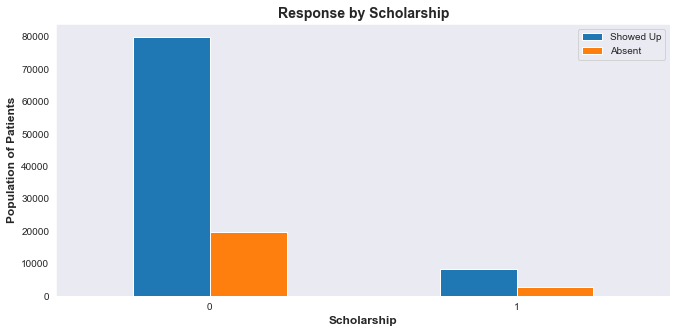

In [177]:
pic_rep('bar', scholarship_response, 'Response by Scholarship', 'Scholarship', 'Population of Patients', False, 360);

There's need to further compute the likelihood of patients being placed on scholarship showing up for appointments, compared to those who are not on scholarship. 

In [178]:
scholarship_response_perc = perc(df, 'scholarship')
scholarship_response_perc

absent,No,Yes
scholarship,,
0,80.19,19.81
1,76.26,23.74


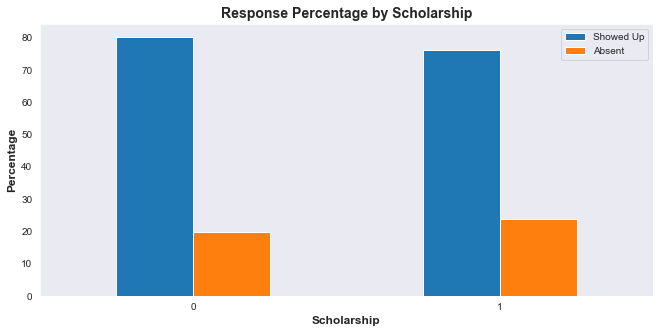

In [179]:
pic_rep('bar', scholarship_response_perc, 'Response Percentage by Scholarship', 'Scholarship', 'Percentage', False, 360);

Scholarship doesn't seem to encourage showing up for appointments. In fact, there is a higher likelihood for a patient placed on scholarship not to show up for appointment.

### Research Question 7: How does SMS notification encourage patients to show up for appointments?

In [180]:
sms_received_response = frame(df, 'sms_received')
sms_received_response

absent,No,Yes
sms_received,,
0,62509,12535
1,25698,9784


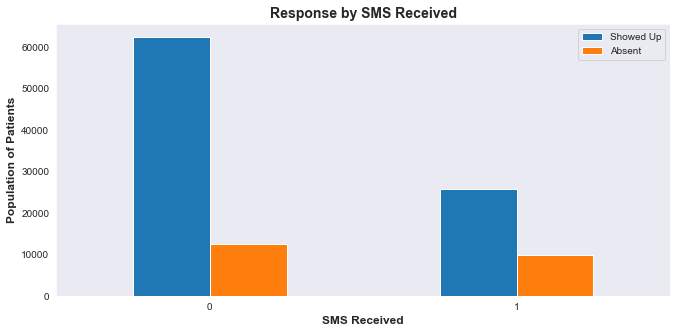

In [181]:
pic_rep('bar', sms_received_response, 'Response by SMS Received', 'SMS Received', 'Population of Patients', False, 360);

The sms_response chart suggests that people still show up for appointments despite not receiving SMS.

#### How about the likelihood of a patient showing up on receiving SMS?

In [182]:
sms_received_perc = perc(df, 'sms_received')
sms_received_perc

absent,No,Yes
sms_received,,
0,83.30,16.70
1,72.43,27.57


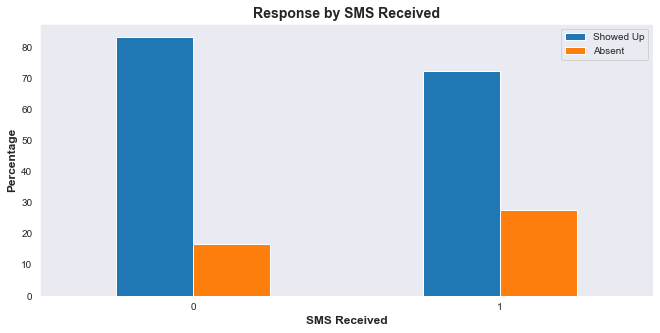

In [183]:
pic_rep('bar', sms_received_perc, 'Response by SMS Received', 'SMS Received', 'Percentage', False, 360);

Surprisingly, the sms_received_perc shows that on receiving SMS patients have higher likelihood of missing their appointments, compared to when they don’t receive any SMS.

<a id='conclusions'></a>
## Conclusions




Based on the following limitations:
- Patients are assumed to either show up or miss appointments, irrespective of their specific medical conditions.
- Proximity of neighbourhood is flexible for all patients.

The following conclusions were drawn: 
- Gender doesn’t seem to affect response to schedules. Despite more females being scheduled for appointments than males, both males and females have equal likelihood of either showing up or missing appointments.
-	Weekdays have more active schedules than weekends, with Mondays, Tuesdays and Wednesdays being the busiest days, in order of increasing number of medical appointments respectively.
- It is not clear how age affects response to appointments, as population distribution could influence prediction. However, people above 65 years of age tend to have less number of medical appointments.
- Although Jardim Camburi has the number of medical appointments, the information provided in this database isn’t sufficient to categorically state why this is so.
- Scholarship doesn’t seem to encourage patients showing up for appointments. In fact, a patient on scholarship has a higher likelihood of not showing up, compared to one who is not on scholarship.
- It is surprising that patients who receive SMS tend to have a higher likelihood of missing medical appointments, compared to those who don’t receive any SMS.


### References:
- <a href='https://stackoverflow.com' target="_blank">Stack Overflow</a>.
- <a href='https://www.pythoncharts.com/matplotlib/pie-chart-matplotlib/' target="_blank">Python Charts</a>.